# Project Title: 
### Understanding and Forecasting Well-being Trends in Galaxies

# Project Description:

The project aims to explore and analyze a dataset containing demographic and socio-economic variables of 181 galaxies over a period of up to 26 years. The dataset consists of 80 variables that characterize various aspects of each galaxy's socio-economic and demographic situation. Additionally, a composite index is provided, serving as a measure of the well-being of each galaxy. However, the specific demographic and socio-economic factors influencing this index remain unknown.

# Methodology:

The methodology employed for this project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework, a process used to guide the machine learning lifecycle. It is a six-phase process consisting of these key phases:

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/rasmodev/Income-Prediction-Challenge-For-Azubian/main/screenshots/CRISP-DM.png" width="600">
</div>

**i. Business Understanding:**
- Thoroughly understand the project's objectives and requirements

**ii. Data Understanding:**
- Load the provided datasets containing demographic and socio-economic variables of galaxies.
- Explore and document the characteristics of the dataset, such as its shape, size, and structure, by examining column information, dataset dimensions, and summary statistics.
- Verify data quality by checking for missing values, duplicates, outliers, accuracy, consistency, relevance, and completeness.
- Explore the data by conducting exploratory data analysis (EDA) techniques such as correlation analysis and data visualization to understand relationships among variables and uncover the underlying factors contributing to the well-being of galaxies.

**iii. Data Preparation:**
- Clean the dataset by handling missing values, duplucates, outliers, and inconsistencies.
- Encode categorical variables to make them ready for machine learning modeling.
- Explore the relationships between variables through exploratory data analysis techniques such as correlation analysis and data visualization.
- Perform feature engineering to prepare the data for model training.
- Prepare the dataset for further analysis by selecting relevant variables and transforming data as needed.

**iv. Modeling:**
- Split the data into train and validation sets.
- Normalize or scale the data to ensure uniformity across variables.
- Split the dataset into training and validation sets to facilitate model training and evaluation.
- Experiment with various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting to build predictive models.


**v. Evaluation:**
- Assess model performance using metrics such as mean squared error, R-squared, and cross-validation techniques to ensure robustness and generalizability.
- Fine-tune the model hyperparameters using techniques like grid search or random search to optimize performance.
- Utilize the best-performing trained predictive model to forecast the well-being index of galaxies for future time periods.
- Provide insights and recommendations based on the predicted future well-being values, identifying potential interventions or policy implications to improve the well-being of galaxies.

**vi. Deployment:**
- Deploy the trained model as a web application for real-time predictions.

Conclusion:
By achieving the stated objectives, this project aims to not only identify the factors driving the well-being of galaxies but also to provide actionable insights for policymakers and researchers. Through rigorous data analysis, exploratory research, and predictive modeling, we aspire to contribute to a deeper understanding of what makes galaxies better off and facilitate informed decision-making aimed at improving the socio-economic conditions of these regions.

# 1. Business Understanding

## 1.1. Objectives:

**i. To identify the variables that best explain the variance of the well-being index:**
  - Explore the dataset to determine which demographic and socio-economic variables most strongly correlate with the well-being index.
  - Utilize statistical methods and machine learning techniques to prioritize variables that exhibit significant correlations with the well-being index.
  - Employ feature selection and dimensionality reduction approaches to streamline the dataset and focus on the most relevant variables.

**ii. To determine the future well-being values of the galaxies:**
  - Develop predictive models capable of forecasting the well-being index of galaxies for future time periods using historical data.
  - Train machine learning algorithms to predict future trends in well-being based on past observations.
  - Evaluate the performance of the predictive models using the Root Mean Square Error (RMSE) metric to ensure accurate predictions.
  - Provide predicted future well-being index values with the highest possible level of certainty using the validation dataset.

# 2. Data Understanding

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing steps.

## 2.1. Setup

### Installations

In [1]:
# !pip install --upgrade scikit-learn

### Importation of Relevant Libraries

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Tests
from scipy.stats import chi2_contingency

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Data Splitting and Sampling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error


# Model saving/export
import pickle

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## 2.2. Data Loading

### Loading the Train and Validation Datasets

#### Train Dataset

In [3]:
# Reading train dataset
train_df = pd.read_csv('Data/Train_data.csv')

# Show an overview of the dataset
train_df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351


#### Validation Dataset

In [4]:
# Reading test dataset
validation_df = pd.read_csv('Data/Validation.csv')

# Show an overview of the dataset
validation_df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.753738,NaN,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Hypothesis    

**Null Hypothesis (H0):** 

**Alternative Hypothesis (H1):** 

## 2.3. Exploratory Data Analysis (EDA)

### Understanding the datasets

#### i. Column Information of The Datasets

In [5]:
# Column information of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

- The **train dataset** contains **3096 rows** and **81 columns**.

- The columns include various demographic and socioeconomic features, as well as the target variable "Well-Being Index," which a measure of the well-being of each galaxy.

- Many columns exhibit missing values.

In [6]:
# Column information of the test dataset
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       720 non-null    int64  
 1   galactic year                                                                            720 non-null    int64  
 2   galaxy                                                                                   720 non-null    object 
 3   existence expectancy index                                                               720 non-null    float64
 4   existence expectancy at birth                                                            720 non-null    float64
 5   Gross income per capita                                         

The test dataset contains 720 rows and 81 columns.

#### ii. Shape of The Datasets

In [7]:
# The shape of the train dataset
train_df.shape

(3097, 81)

In [8]:
# The shape of the test dataset
validation_df.shape

(720, 81)

The shape of the train dataset is (3097, 81), indicating 3097 rows and 81 columns. The test dataset has dimensions of (720, 81), denoting 720 rows and 81 columns.

#### iii. Summary Statistics Datasets

Summary statistics for both the train and test datasets are presented below. These statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numeric column.

In [9]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3)

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
count,3097.000,3097.000,3096.000,3096.000,3069.000,3069.000,2968.000,2742.000,2716.000,2716.000,...,389.000,388.000,387.000,379.000,378.000,443.000,516.000,379.000,357.000,3097.000
mean,157659.407,998464.066,0.863,76.198,31175.236,0.819,14.442,10.058,0.794,0.731,...,0.793,0.819,0.997,115.539,114.562,21.018,6.206,23.850,0.633,0.083
std,230716.475,5417.848,0.165,10.540,18574.375,0.194,3.623,3.265,0.176,0.199,...,0.190,0.163,0.095,43.341,43.561,13.741,4.565,19.876,0.205,0.056
min,10065.000,990025.000,0.228,34.244,-126.907,0.292,3.800,1.928,0.274,0.190,...,0.306,0.370,0.465,23.540,16.215,-59.119,-1.192,-207.980,0.168,0.031
25%,38554.000,994009.000,0.750,69.056,19876.218,0.672,12.308,7.482,0.658,0.582,...,0.665,0.700,0.945,78.453,78.286,15.156,3.987,17.230,0.470,0.049
50%,67570.000,998001.000,0.899,78.483,26058.342,0.821,14.700,10.129,0.813,0.748,...,0.807,0.830,1.023,116.789,114.481,21.428,5.148,24.338,0.658,0.059
75%,95992.000,1003002.000,0.986,84.136,36351.452,0.963,16.845,12.594,0.926,0.881,...,0.940,0.943,1.061,146.081,149.010,28.805,6.537,32.095,0.794,0.088
max,998085.000,1011030.000,1.204,99.594,132861.543,1.362,25.304,19.058,1.187,1.209,...,1.174,1.161,1.181,217.500,226.816,61.904,31.822,95.941,1.098,0.380


In [10]:
# Summary Statistics of The Test Dataset
validation_df.describe().round(3)

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
count,720.000,720.000,720.000,720.000,720.000,720.000,720.000,717.000,717.000,717.000,...,519.000,519.000,519.000,506.000,506.000,465.000,419.000,490.000,481.000,0.0
mean,540575.762,1010516.689,0.917,79.691,33855.573,0.858,15.943,11.158,0.848,0.804,...,0.848,0.865,1.018,126.283,125.303,21.463,6.727,21.010,0.575,NaN
std,269355.612,3604.656,0.143,9.502,19373.363,0.188,3.292,3.364,0.167,0.192,...,0.178,0.152,0.079,47.842,48.761,14.796,5.103,42.381,0.202,NaN
min,13606.000,1003002.000,0.441,49.561,547.582,0.345,4.879,2.435,0.380,0.331,...,0.336,0.415,0.697,23.225,19.728,-76.741,0.119,-735.187,0.089,NaN
25%,305458.500,1006009.000,0.819,73.588,21838.682,0.711,13.768,8.527,0.722,0.661,...,0.718,0.756,0.976,87.309,85.211,14.657,4.341,17.240,0.404,NaN
50%,538092.500,1011030.000,0.942,81.639,28904.644,0.870,16.028,11.332,0.866,0.805,...,0.861,0.887,1.036,125.215,126.313,22.777,5.416,24.668,0.602,NaN
75%,793178.500,1013042.000,1.028,87.023,39838.011,1.001,18.158,13.873,0.967,0.952,...,0.988,0.976,1.074,167.093,163.691,29.564,7.009,31.608,0.736,NaN
max,999488.000,1015056.000,1.247,100.210,151072.683,1.325,26.956,18.771,1.233,1.270,...,1.238,1.183,1.168,232.721,233.915,57.726,36.538,85.510,1.034,NaN


The summary statistics offer insights into the distribution and range of values across various features, facilitating further analysis and understanding of the datasets.

#### iv. Checking for Missing Values in The Datasets

Understanding the prevalence of missing values across different features is essential for assessing data completeness and potential biases in analyses. Below is an exploration of the missing values in the train and validation datasets.

Missing values in the Train dataset:
************************************
                                                                                 Column  Missing Values  Missing Values %
                                                  Current health expenditure (% of GGP)            2789             90.05
                                   Interstellar Data Net users, total (% of population)            2788             90.02
                                      Interstellar phone subscriptions (per 100 people)            2780             89.76
                                     Respiratory disease incidence (per 100,000 people)            2776             89.64
                                                          Gender Inequality Index (GII)            2740             88.47
                                      Intergalactic Development Index (IDI), male, Rank            2719             87.79
                                                Private galaxy capital f

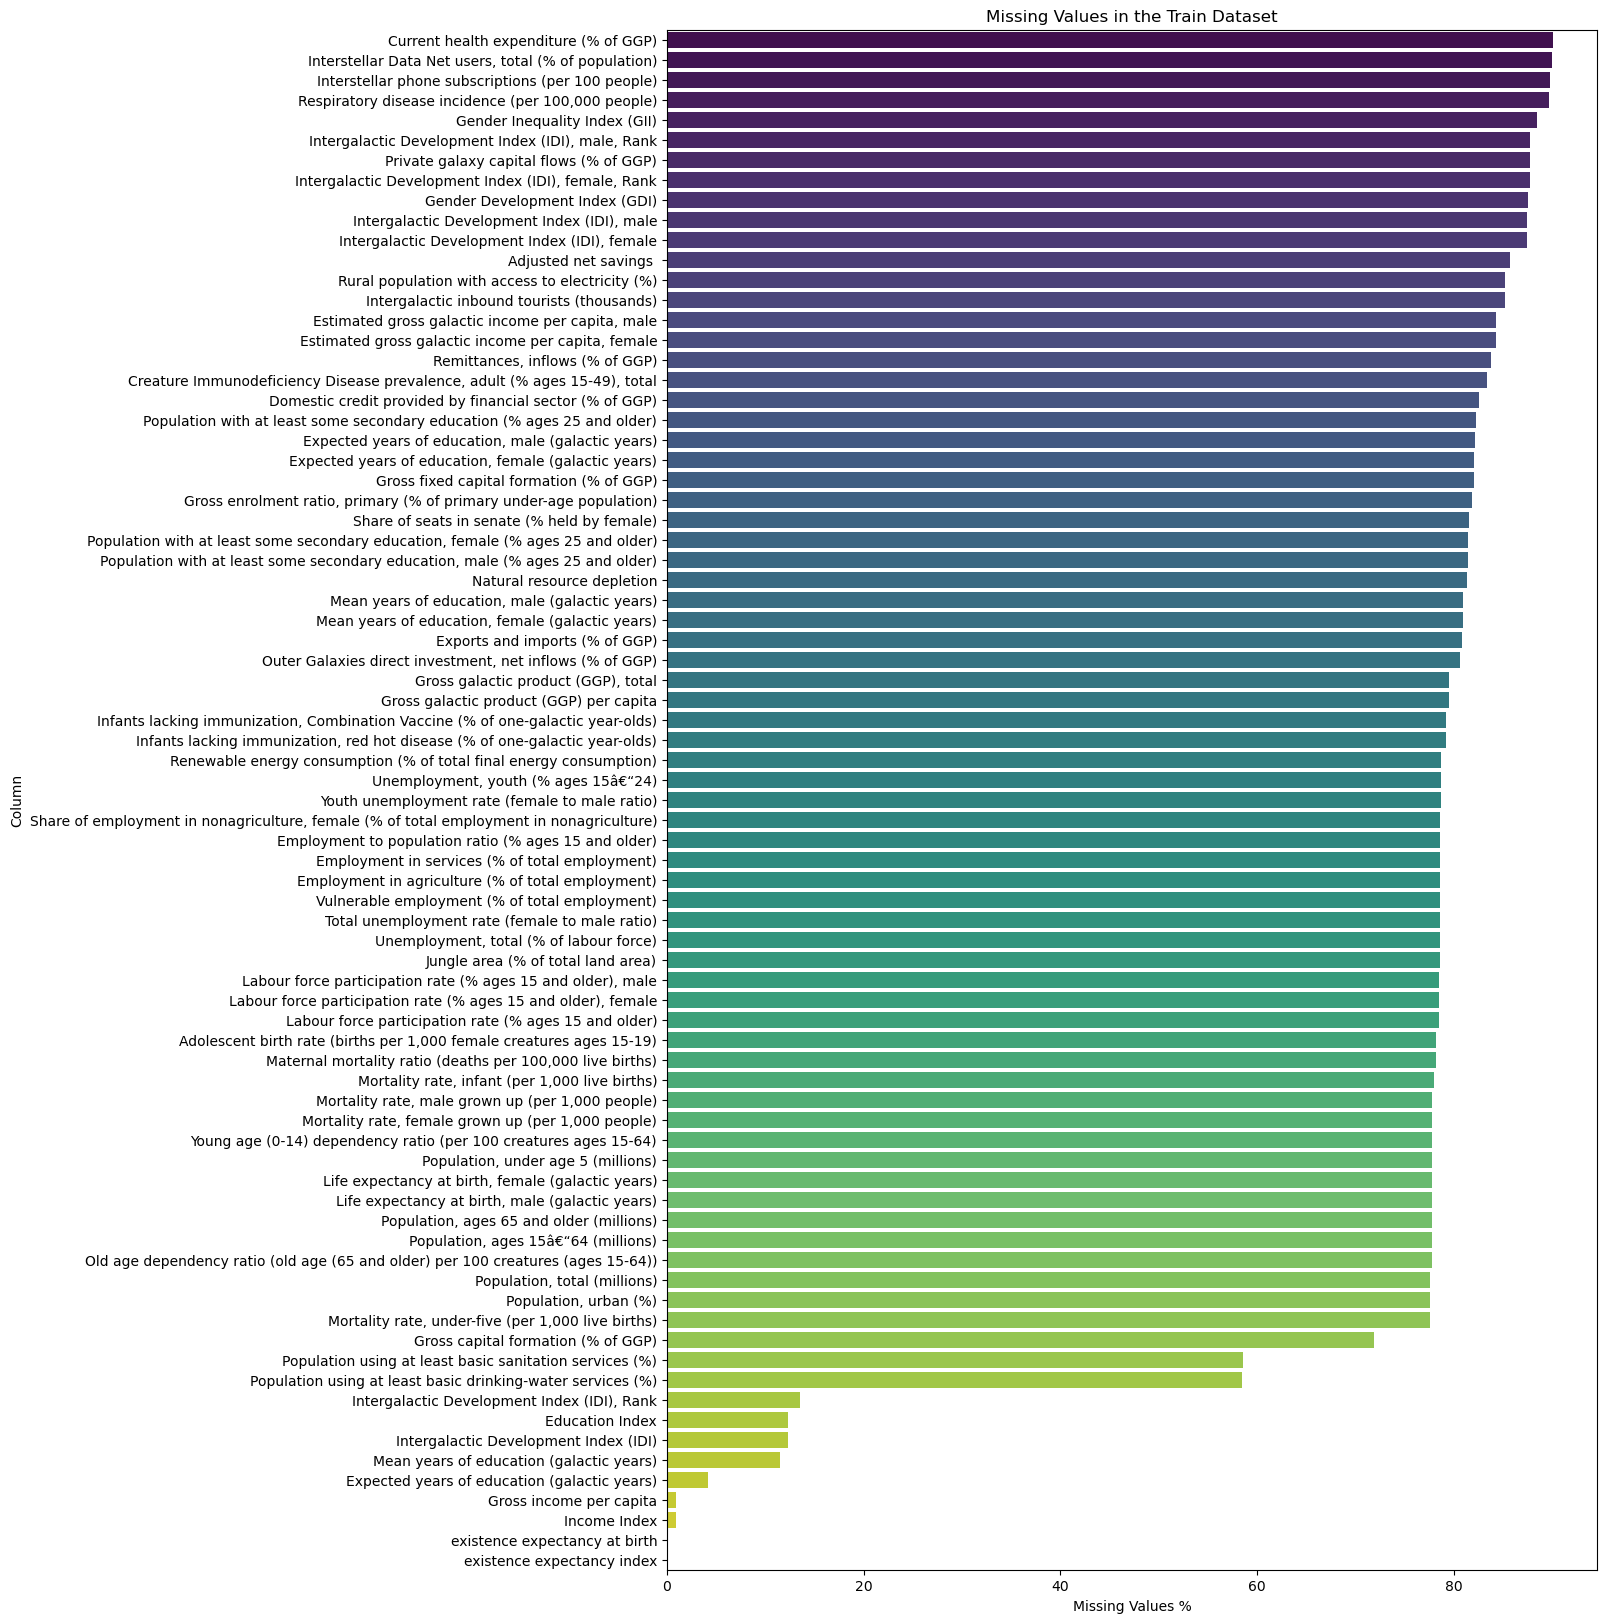

Missing values in the Validation dataset:
*****************************************
                                                                                 Column  Missing Values  Missing Values %
                                                             Predicted Well-Being Index             720            100.00
              Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total             301             41.81
                                                                  Adjusted net savings              255             35.42
                     Gross enrolment ratio, primary (% of primary under-age population)             249             34.58
                                                          Gender Inequality Index (GII)             239             33.19
                                                Private galaxy capital flows (% of GGP)             230             31.94
                Population with at least some secondary educat

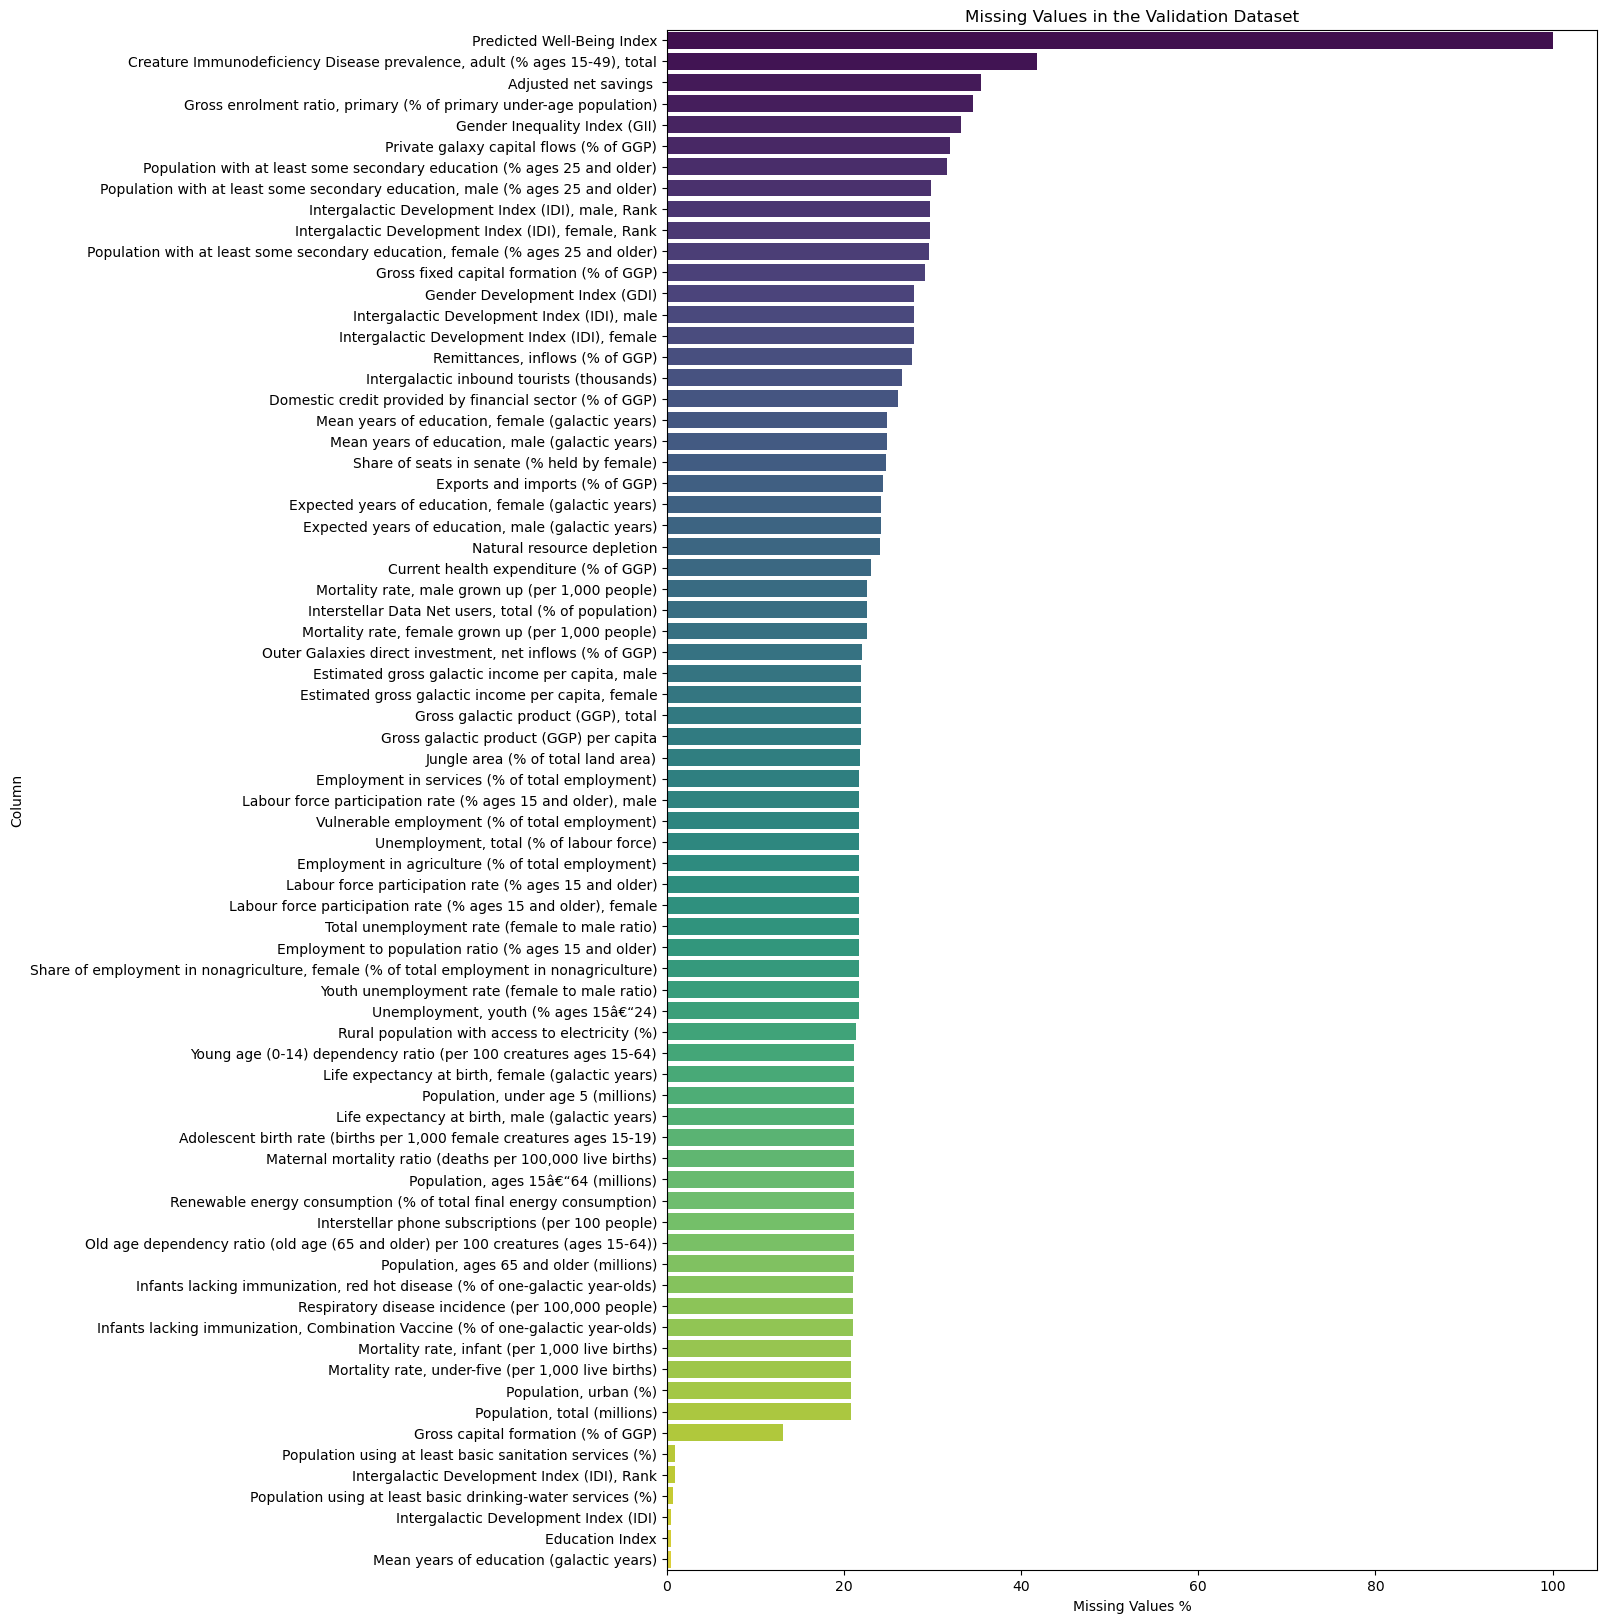

In [11]:
# Define The datasets
datasets = {'train': train_df, 'validation': validation_df}

# Define a function to print the missing values in the datasets
def show_missing_values(datasets):
    for name, data in datasets.items():
        title = f"Missing values in the {name.capitalize()} dataset:"

        # Create an underline of asterisks
        underline = '*' * len(title)
        print(title)
        print(underline)

        # Calculate the sum of missing values for each column
        missing_values = data.isnull().sum()

        # Exclude columns with 0 as missing values
        missing_values = missing_values[missing_values > 0]

        # Check if there are any columns with missing values
        if not missing_values.empty:

            # Calculate the percentage of missing values
            missing_percentages = ((missing_values / len(data)) * 100).round(2)

            # Create a DataFrame with columns sorted by missing values percentage (highest to lowest)
            missing_info = pd.DataFrame({
                'Column': missing_values.index,
                'Missing Values': missing_values,
                'Missing Values %': missing_percentages
            })

            # Sort the DataFrame by missing values percentage in descending order
            missing_info = missing_info.sort_values(by='Missing Values %', ascending=False)

            # Use to_string to remove index column
            print(missing_info.to_string(index=False))
            print('===' * 41)
        else:
            # If no missing values found, indicate that
            print("No missing values found.")
        print()
        
        # Set the plot size
        plt.figure(figsize=(12, 20))

        # Create a horizontal bar graph with the Viridis palette
        ax = sns.barplot(x="Missing Values %", y="Column", data=missing_info, palette="viridis")

        # Set the axis labels and title
        ax.set(xlabel="Missing Values %", ylabel="Column", title=f"Missing Values in the {name.capitalize()} Dataset")

        # Display the plot
        plt.show()

# Call the function to show missing values in the datasets
show_missing_values(datasets)

**General Insights on Missing Values:**
- Missing values are present in varying degrees, with some columns having higher percentages of missing data than others.
- The missing data percentages range from 0.42% to 100% across the dataset, indicating substantial variability in data completeness.
- Features related to socio-economic indicators, healthcare, and demographic factors commonly exhibit missing data, highlighting potential challenges in data collection or reporting.

**Train Dataset:**
- The train dataset exhibits a considerable number of missing data points across multiple features, with some columns having over 90% missing data.
- Features such as "Current health expenditure (% of GGP)" and "Interstellar Data Net users, total (% of population)" have particularly high percentages of missing data, exceeding 90%.
- Socio-economic indicators and demographic factors are among the features with the highest percentages of missing data in the train dataset.
- Missing data in the train dataset should be addressed carefully during data preprocessing to prevent potential biases in subsequent analyses.

**Validation Dataset:**
- The validation dataset also shows a notable presence of missing data, with several features having missing data percentages above 30%.
- Notably, the "Predicted Well-Being Index" column has 100% missing data, indicating that this feature may not be available for validation data.
- Similar to the train dataset, socio-economic and demographic indicators exhibit relatively high percentages of missing data in the validation dataset.
- Addressing missing data in the validation dataset is crucial for ensuring the accuracy and generalizability of predictive models trained on the data.

Addressing missing data is crucial to ensure the reliability and validity of analyses and models built on the dataset. We drop columns with over 80% missing values first then handle the rest after selecting the most relevant features.

##### Dropping columns with > 80% missing values in the Test and Validation Datasets

Columns with high percentages of missing values > 80%) are likely to introduce noise. Dropping such columns will help prevent biases in our subsequent analyses.

In [12]:
# Checking the percentage of missing values in train_selected_df
total_missing_train = train_df.isnull().sum().sort_values(ascending=False)
percent_missing_train = (train_df.isnull().sum() / len(train_df)).sort_values(ascending=False)
missing_data_train = pd.concat([total_missing_train, percent_missing_train], axis=1, keys=['Total Missing', 'Missing %'])

# Select columns with missing values percentage above 80% in train_selected_df
columns_to_drop_train = missing_data_train[missing_data_train['Missing %'] > 0.8].index

# Drop columns with missing values above 80% in train_selected_df
train_df = train_df.drop(columns_to_drop_train, axis=1)

# Print the percentages of the remaining columns rounded to 2 decimal places
print("Percentages of remaining columns after dropping columns with missing values above 80% in train_df:")
print("*" * 50)
print((train_df.isnull().sum() / len(train_df)).sort_values(ascending=False).round(2))
print("*" * 50)

Percentages of remaining columns after dropping columns with missing values above 80% in train_df:
**************************************************
Gross galactic product (GGP) per capita                                                    0.80
Gross galactic product (GGP), total                                                        0.80
Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)            0.79
Infants lacking immunization, red hot disease (% of one-galactic year-olds)                0.79
Renewable energy consumption (% of total final energy consumption)                         0.79
Unemployment, youth (% ages 15â€“24)                                                       0.79
Youth unemployment rate (female to male ratio)                                             0.79
Employment in agriculture (% of total employment)                                          0.79
Total unemployment rate (female to male ratio)                                    

In [13]:
# Checking the percentage of missing values in validation_selected_df
total_missing_validation = validation_df.isnull().sum().sort_values(ascending=False)
percent_missing_validation = (validation_df.isnull().sum() / len(validation_df)).sort_values(ascending=False)
missing_data_validation = pd.concat([total_missing_validation, percent_missing_validation], axis=1, keys=['Total Missing', 'Missing %'])

# Select columns with missing values percentage above 80% in validation_selected_df
columns_to_drop_validation = missing_data_validation[missing_data_validation['Missing %'] > 0.8].index

# Drop columns with missing values above 80% in validation_selected_df
validation_df = validation_df.drop(columns_to_drop_validation, axis=1)

print("Percentages of remaining columns after dropping columns with missing values above 80% in validation_df:")
print("==" * 51)
print((validation_df.isnull().sum() / len(validation_df)).sort_values(ascending=False).round(2))
print("==" * 51)

Percentages of remaining columns after dropping columns with missing values above 80% in validation_df:
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0.42
Adjusted net savings                                                         0.35
Gross enrolment ratio, primary (% of primary under-age population)           0.35
Gender Inequality Index (GII)                                                0.33
Private galaxy capital flows (% of GGP)                                      0.32
                                                                             ... 
Gross income per capita                                                      0.00
existence expectancy at birth                                                0.00
existence expectancy index                                                   0.00
galaxy                                                                       0.00
ID                                                                          

#### iv. Correlation Analysis to Identify Most Relevant Features to The Target Variable

In [14]:
# Separate numerical and categorical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

##### a. Correlation Analysis of The Categorical Variables with the Target Variable

In [15]:
# View the categorical_columns
categorical_columns

Index(['galaxy'], dtype='object')

Since we only have one categorical column, we will use a hypothesis test to identify whether there is a significant relationshp between 'galaxy' and the 'Well-being Index'. We start by defining our hypothesis:

- **Null hypothesis (H0)**: There is no significant association between galaxy and the Well-Being Index.

- **Alternative hypothesis (H1)**: There is a significant association between galaxy and the Well-Being Index.

We will use a Chi-square test to test our hypothesis

In [16]:
# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(train_df['galaxy'], train_df['Well-Being Index']))

# Calculate Cramer's V
num_obs = train_df.shape[0]
cramers_v = np.sqrt(chi2_stat / (num_obs * min(train_df['galaxy'].nunique(), train_df['Well-Being Index'].nunique()) - 1))

# Interpret results
alpha = 0.05
print("Chi-square Test Results:")
print("-" * 30)
print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.5f}")
print(f"Degrees of Freedom: {dof}")
print(f"Cramer's V: {cramers_v:.2f}")
print("-" * 30)

if p_val < alpha:
    print("Hypothesis Conclusion:")
    print("-" * 30)
    print("The null hypothesis is rejected.")
    print("There is a significant association between galaxy and the Well-Being Index.")
    if cramers_v < 0.1:
        print("However, the effect size is small.")
    elif cramers_v < 0.3:
        print("The effect size is moderate.")
    else:
        print("The effect size is large.")
else:
    print("Hypothesis Conclusion:")
    print("-" * 30)
    print("The null hypothesis is accepted.")
    print("There is no significant association between galaxy and the Well-Being Index.")

Chi-square Test Results:
------------------------------
Chi-square Statistic: 557460.00
P-value: 0.43207
Degrees of Freedom: 557280
Cramer's V: 1.00
------------------------------
Hypothesis Conclusion:
------------------------------
The null hypothesis is accepted.
There is no significant association between galaxy and the Well-Being Index.


- The p-value associated with the chi-square statistic is 0.43207, suggesting that there is no statistically significant association between galaxy and the Well-Being Index.
- With a p-value greater than the typical significance level of 0.05, we fail to reject the null hypothesis.
- Therefore, based on these results, we conclude that there is no significant association between galaxy and the Well-Being Index. For this reason, the 'galaxy' variable should not be included in the dataset for predicting the well-being Index.

##### b. Correlation Analysis of The Numerical Variables in The Dataset  with the Target Variable

In [17]:
# Calculating the correlation matrix
correlation_matrix = train_df[numerical_columns].corr()
correlation_matrix

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Unemployment, youth (% ages 15â€“24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Well-Being Index
ID,1.000000,0.629478,0.106242,0.105994,0.069515,0.086585,0.175787,0.132984,0.105872,0.146600,...,0.016205,-0.066725,-0.081955,-0.172306,-0.106638,0.048665,0.012755,-0.069391,-0.059070,0.021307
galactic year,0.629478,1.000000,0.132886,0.129963,0.083711,0.093645,0.246112,0.179790,0.141344,0.215237,...,0.084531,-0.059619,-0.091394,-0.229825,-0.100246,0.112619,-0.010575,-0.108222,-0.045144,0.016315
existence expectancy index,0.106242,0.132886,1.000000,0.910615,0.493711,0.721775,0.723083,0.661653,0.823243,0.704162,...,0.094028,-0.863922,-0.810838,-0.540389,-0.550519,0.511227,0.055600,-0.797163,-0.635694,0.584568
existence expectancy at birth,0.105994,0.129963,0.910615,1.000000,0.505056,0.729360,0.723787,0.661207,0.829971,0.708900,...,0.086598,-0.860340,-0.808502,-0.568548,-0.555171,0.515524,0.070872,-0.808162,-0.665885,0.587930
Gross income per capita,0.069515,0.083711,0.493711,0.505056,1.000000,0.734411,0.477747,0.442323,0.603421,0.482661,...,-0.056818,-0.454248,-0.499114,-0.296168,-0.295732,0.880723,0.031273,-0.400872,-0.430831,0.507892
Income Index,0.086585,0.093645,0.721775,0.729360,0.734411,1.000000,0.715325,0.641012,0.831699,0.704032,...,0.138212,-0.646161,-0.630694,-0.447152,-0.445532,0.733381,0.061190,-0.638112,-0.649466,0.606666
Expected years of education (galactic years),0.175787,0.246112,0.723083,0.723787,0.477747,0.715325,1.000000,0.753190,0.831770,0.853048,...,0.221648,-0.618283,-0.550761,-0.581833,-0.548628,0.492572,0.038195,-0.681207,-0.593287,0.611651
Mean years of education (galactic years),0.132984,0.179790,0.661653,0.661207,0.442323,0.641012,0.753190,1.000000,0.793341,0.866746,...,0.178464,-0.577154,-0.472158,-0.542291,-0.484617,0.468229,0.047577,-0.628086,-0.564562,0.611781
Intergalactic Development Index (IDI),0.105872,0.141344,0.823243,0.829971,0.603421,0.831699,0.831770,0.793341,1.000000,0.843432,...,0.165835,-0.740407,-0.682176,-0.583053,-0.553945,0.622079,0.063588,-0.735854,-0.679564,0.661725
Education Index,0.146600,0.215237,0.704162,0.708900,0.482661,0.704032,0.853048,0.866746,0.843432,1.000000,...,0.210510,-0.595408,-0.511960,-0.563588,-0.497785,0.493163,0.038933,-0.658560,-0.576853,0.645374


Due to the high number of numerical variables we do not plot the correlation matrix plot as it will be too clustered.

##### b. Calculating the Correlation Matrix of Each Variable with The Well-Being Index

In [18]:
# Extracting the correlation of each variable with the well-being index
correlation_with_well_being = correlation_matrix['Well-Being Index']

# Creating a DataFrame with variables and their correlation with the well-being index
correlation_df = pd.DataFrame(correlation_with_well_being)
correlation_df.columns = ['Correlation with Well-Being Index']

# Sorting the DataFrame by correlation values from highest to lowest
sorted_correlation_df = correlation_df.sort_values(by='Correlation with Well-Being Index', ascending=False)

# Adding index and variable heading
sorted_correlation_df.index.name = 'Variable'
sorted_correlation_df.reset_index(inplace=True)

# Print the sorted correlation
sorted_correlation_df

,Variable,Correlation with Well-Being Index
0,Well-Being Index,1.000000
1,Old age dependency ratio (old age (65 and olde...,0.740961
2,Intergalactic Development Index (IDI),0.661725
3,Education Index,0.645374
4,Mean years of education (galactic years),0.611781
5,Expected years of education (galactic years),0.611651
6,Income Index,0.606666
7,existence expectancy at birth,0.587930
8,existence expectancy index,0.584568
9,"Life expectancy at birth, male (galactic years)",0.580025


The correlation matrix provides a comprehensive overview of the relationships between different variables and the well-being index.

**Positive Correlation**: 

- Variables such as "Old age dependency ratio," "Intergalactic Development Index (IDI)," "Education Index," and "Mean years of education" exhibit a strong positive correlation with the Well-Being Index.
- As these variables increase, the well-being tends to increase as well.
  

**Negative Correlation**: 

- Conversely, variables like "Young age dependency ratio," "Intergalactic Development Index (IDI) Rank," "Gender Inequality Index (GII)," and various mortality rates show a strong negative correlation with the Well-Being Index.
- An increase in these variables correlates with a decrease in well-being.
  

**Magnitude of Correlation**: 

- The strength of correlation varies across different variables, indicating varying degrees of influence on overall well-being.

Understanding both the direction and strength of correlation helps prioritize variables for further analysis and intervention to improve well-being.
  
We will use the absolute correlation values to select the most relevant features, focusing on the magnitude of the correlation coefficients rather than their direction (positive or negative). Variables with higher absolute correlation values will be prioritized for further analysis, as they have a more significant impact on overall well-being.

By considering the correlation analysis results, we can identify key determinants of well-being and develop targeted interventions to improve the well-being of the population.

##### c. Calculating the Absolute Correlation Values of the Variables with Respect to the Target Variable

- Absolute correlation measures the strength of the linear relationship between two variables, irrespective of the direction of the relationship (positive or negative).
- In correlation analysis, coefficients range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
- Absolute correlation focuses solely on the magnitude of the correlation coefficient, disregarding its sign (positive or negative).
- This approach is valuable for identifying variables strongly associated with each other, regardless of whether the relationship is positive or negative.

In [19]:
# Sorting the correlation DataFrame by absolute correlation values and rounding off to 2 decimal places
sorted_correlation_df = correlation_df.iloc[:-1].abs().sort_values(by='Correlation with Well-Being Index', ascending=False).round(2)

# Add a new column 'Variable' with variable names
sorted_correlation_df['Variable'] = sorted_correlation_df.index

# Reset the index to make 'Variable' a regular column
sorted_correlation_df.reset_index(drop=True, inplace=True)

# Reorder the columns to have 'Variable' as the first column
sorted_correlation_df = sorted_correlation_df[['Variable', 'Correlation with Well-Being Index']]

# Print the updated DataFrame
sorted_correlation_df

,Variable,Correlation with Well-Being Index
0,Old age dependency ratio (old age (65 and olde...,0.74
1,"Intergalactic Development Index (IDI), Rank",0.71
2,Intergalactic Development Index (IDI),0.66
3,Education Index,0.65
4,Young age (0-14) dependency ratio (per 100 cre...,0.64
5,Mean years of education (galactic years),0.61
6,Expected years of education (galactic years),0.61
7,Income Index,0.61
8,existence expectancy at birth,0.59
9,existence expectancy index,0.58


This above dataframe presents the absolute correlation values of the variables with respect to the Well-Being Index in descending order.

##### c. Selecting The Most Relevant Features to the Target Variable

To select the most relevant features, we set a threshold value of 0.55 to filter out correlations below this threshold, allowing us to prioritize variables with stronger associations with the target variable (well-being index).

- By excluding correlations below 0.55, we concentrate on variables that have a more significant impact on the variance of the well-being index, enhancing the relevance of our analysis.

- This approach simplifies the selection process, ensuring that we concentrate on the most meaningful predictors for understanding and predicting well-being outcomes.

In [20]:
# Selecting the top features with the highest correlation with the well-being index
threshold = 0.55
top_features = sorted_correlation_df[sorted_correlation_df['Correlation with Well-Being Index'] > threshold]

# Reset the index to make 'Variable' a regular column and rename the index column
top_features.reset_index(inplace=True)
top_features = top_features[['Variable', 'Correlation with Well-Being Index']]  # Keep only the desired columns

# Print the updated DataFrame
top_features

,Variable,Correlation with Well-Being Index
0,Old age dependency ratio (old age (65 and olde...,0.74
1,"Intergalactic Development Index (IDI), Rank",0.71
2,Intergalactic Development Index (IDI),0.66
3,Education Index,0.65
4,Young age (0-14) dependency ratio (per 100 cre...,0.64
5,Mean years of education (galactic years),0.61
6,Expected years of education (galactic years),0.61
7,Income Index,0.61
8,existence expectancy at birth,0.59
9,existence expectancy index,0.58


These are the most relevant features for our analysis.

##### d. Saving the Selected Numerical Features as an Updated Train Dataset

We will now save the selected numerical features as a new training dataset called `train_selected_df`.

In [21]:
# List of selected numerical features plus target column
selected_features = top_features['Variable'].tolist() + ['Well-Being Index']

# Create a new DataFrame with selected numerical features
train_selected_df = train_df[selected_features]

# Display the first few rows of the new DataFrame
train_selected_df.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)",Well-Being Index
0,NaN,247.196654,0.507534,0.471400,NaN,5.196527,7.857841,0.458599,56.397241,0.624015,NaN,NaN,0.041404
1,NaN,137.299057,0.807108,0.837559,NaN,13.065734,15.869798,0.757218,80.924094,0.970048,NaN,NaN,0.098777
2,NaN,74.709302,0.973684,0.890396,NaN,11.399711,17.545117,1.032429,82.441006,0.995540,NaN,NaN,0.200747
3,25.90051,NaN,NaN,NaN,63.814203,NaN,13.578086,0.707776,75.635986,1.004362,78.212442,83.599606,0.067170
4,NaN,141.210462,0.965452,0.798000,NaN,11.749071,13.518157,0.951402,83.412540,1.050627,NaN,NaN,0.078351


In [22]:
# View the selected columns
train_selected_df.columns

Index(['Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Intergalactic Development Index (IDI), Rank',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
       'Mean years of education (galactic years)',
       'Expected years of education (galactic years)', 'Income Index',
       'existence expectancy at birth', 'existence expectancy index',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (galactic years)',
       'Well-Being Index'],
      dtype='object')

##### e. Column Selection for Validation Data Based on Correlation Analysis Results

In [23]:
# View the selected columns from train_selected_df
selected_columns = ['Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Intergalactic Development Index (IDI), Rank',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
       'Mean years of education (galactic years)',
       'Expected years of education (galactic years)', 'Income Index',
       'existence expectancy at birth', 'existence expectancy index',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (galactic years)']

# Select the same columns from validation_df
validation_selected_df = validation_df[selected_columns]
validation_selected_df.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
0,NaN,191.852274,0.715746,0.745786,NaN,11.282011,16.083635,0.691448,82.718434,0.803915,NaN,NaN
1,18.465489,172.983630,0.727915,0.806982,93.037719,10.493260,12.858577,0.669550,73.682279,0.860011,75.471585,71.559936
2,NaN,180.488519,0.757072,0.852921,NaN,9.962169,14.236676,0.766118,68.456526,0.810644,NaN,NaN
3,15.580847,186.040542,0.759207,0.801123,84.192931,10.329880,14.281498,0.757196,68.742404,0.837170,72.223250,79.105845
4,NaN,155.296209,0.673619,0.528564,NaN,7.132999,12.510524,0.641228,72.093220,0.749034,NaN,NaN


##### f. Handling missing values in the resultant columns in the test and validation datasets

In [24]:
# Defining a function to check and print out missing values in the datasets
def check_missing_values(df, name):
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percent_missing = ((df.isnull().sum() / len(df)) * 100).round(2).sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Missing %'])
    
    print(f"Missing values in {name}:")
    print("==" * 38)
    print(missing_data)
    print("==" * 38)

# Check missing values in train_selected_df
check_missing_values(train_selected_df, "train_selected_df")

# Check missing values in validation_selected_df
check_missing_values(validation_selected_df, "validation_selected_df")

Missing values in train_selected_df:
                                                    Total Missing  Missing %
Old age dependency ratio (old age (65 and older...           2409      77.78
Young age (0-14) dependency ratio (per 100 crea...           2409      77.78
Life expectancy at birth, male (galactic years)              2409      77.78
Life expectancy at birth, female (galactic years)            2409      77.78
Intergalactic Development Index (IDI), Rank                   419      13.53
Intergalactic Development Index (IDI)                         381      12.30
Education Index                                               381      12.30
Mean years of education (galactic years)                      355      11.46
Expected years of education (galactic years)                  129       4.17
Income Index                                                   28       0.90
existence expectancy at birth                                   1       0.03
existence expectancy index             

To determine the most relevant simple imputation strategy for handling the missing values in the dataset, we need to conduct a detailed analysis based on the nature of the variables. Here's a breakdown of the missing values in both the `train_selected_df` and `validation_selected_df` datasets:

### Missing Values Analysis:

**Train Dataset:**
- **Old Age Dependency Ratio and Young Age Dependency Ratio:** These variables have a high percentage of missing values (77.78%). They represent demographic indicators related to the dependency ratios, indicating the proportion of dependent individuals in the population relative to the working-age population. Given their nature, imputing missing values based on the median or mean may be appropriate.
- **Life Expectancy at Birth (Male and Female):** Similarly, life expectancy indicators have a high percentage of missing values (77.78%). Imputation methods such as median or mean imputation could be suitable for these variables.
- **Intergalactic Development Index (IDI) and IDI Rank:** These indicators also have a considerable number of missing values (around 13.53% and 12.30%, respectively). Since IDI represents a composite index based on various socio-economic factors, imputation based on the mean or median of similar galaxies or regions could be considered.
- **Education Index, Mean Years of Education, Expected Years of Education, and Income Index:** These socio-economic indicators have relatively fewer missing values, ranging from 0.90% to 12.30%. Imputation methods like mean or median imputation may suffice for these variables.
- **Existence Expectancy at Birth and Existence Expectancy Index:** These variables have very few missing values (less than 1%). Imputing missing values with the mean or median might be reasonable.

**Validation Dataset:**
- The missing values pattern in the validation dataset is similar to that of the training dataset, albeit with fewer missing values.
- The same imputation strategies discussed for the training dataset can be applied to the validation dataset due to the similarity in variables and their nature.

### Imputation Strategies:
**Old Age Dependency Ratio and Young Age Dependency Ratio:**
   - Impute missing values with the median value of each respective column.

**Life Expectancy at Birth (Male and Female):**
   - Impute missing values with the median value of each respective column.
   
**Intergalactic Development Index (IDI) and IDI Rank:**
   - Impute missing values with the mean value of each respective column.
   
**Education Index, Mean Years of Education, Expected Years of Education, and Income Index:**
   - Impute missing values with the mean value of each respective column.
   
**Existence Expectancy at Birth and Existence Expectancy Index:**
   - Impute missing values with the mean value of each respective column.

These imputation strategies aim to maintain consistency while addressing the missing values in both datasets. Once the imputation is completed, the datasets can be used for further analysis.et.

In [25]:
# Define columns for imputation
columns_to_impute_median = ['Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
                            'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
                            'Life expectancy at birth, male (galactic years)',
                            'Life expectancy at birth, female (galactic years)']

columns_to_impute_mean = ['Intergalactic Development Index (IDI), Rank',
                          'Intergalactic Development Index (IDI)',
                          'Education Index',
                          'Mean years of education (galactic years)',
                          'Expected years of education (galactic years)',
                          'Income Index',
                          'existence expectancy at birth',
                          'existence expectancy index']

# Define imputer strategies
imputer_train_median = SimpleImputer(strategy='median')
imputer_train_mean = SimpleImputer(strategy='mean')
imputer_val_median = SimpleImputer(strategy='median')
imputer_val_mean = SimpleImputer(strategy='mean')

# Impute missing values in train_selected_df
for column in columns_to_impute_median:
    train_selected_df[column] = imputer_train_median.fit_transform(train_selected_df[[column]])
for column in columns_to_impute_mean:
    train_selected_df[column] = imputer_train_mean.fit_transform(train_selected_df[[column]])

# Impute missing values in validation_selected_df
for column in columns_to_impute_median:
    validation_selected_df[column] = imputer_val_median.fit_transform(validation_selected_df[[column]])
for column in columns_to_impute_mean:
    validation_selected_df[column] = imputer_val_mean.fit_transform(validation_selected_df[[column]])

# Check missing values
print("Missing values in train_selected_df:")
print("==" * 43)
print(train_selected_df.isnull().sum())
print("*" * 43)
print("Missing values in validation_selected_df:")
print("==" * 43)
print(validation_selected_df.isnull().sum())
print("==" * 43)

Missing values in train_selected_df:
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0
Intergalactic Development Index (IDI), Rank                                         0
Intergalactic Development Index (IDI)                                               0
Education Index                                                                     0
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)                    0
Mean years of education (galactic years)                                            0
Expected years of education (galactic years)                                        0
Income Index                                                                        0
existence expectancy at birth                                                       0
existence expectancy index                                                          0
Life expectancy at birth, male (galactic years)                                     0
Life expectancy a

All missing values in the dataset have been handled. We can now proceed with further analysis.

#### v. Checking for Duplicate Values in The Datasets

In [26]:
# Check for duplicates in train_df
duplicate_rows_train = train_selected_df[train_selected_df.duplicated()]

# Check for duplicates in validation_df
duplicate_rows_validation = validation_selected_df[validation_selected_df.duplicated()]

# Display the number of duplicate rows in each dataset
print("Number of duplicate rows in train_df:", len(duplicate_rows_train))
print("Number of duplicate rows in validation_df:", len(duplicate_rows_validation))

Number of duplicate rows in train_df: 0
Number of duplicate rows in validation_df: 0


There are no duplicates in both the train and validation datasets.

# 3. Data Preparation

Since we prepared all our data previously, identified the features relevant for modeling and we have no categorical columns to encode. The dataset is ready for modeling

# 4. Modeling

## 4.1. Dataset Splitting

In [27]:
# Split the dataset into features (X) and target variable (y)
X = train_selected_df.drop(columns=['Well-Being Index'])
y = train_selected_df['Well-Being Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Training Set (X_train, y_train): This contains a random 80% portion of your data, used for training your model. The train_test_split function is configured to ensure that the class distribution (stratification) is preserved in this set, making it representative of the original data.

- Evaluation Set (X_eval, y_eval): This holds the remaining 20% of your data and is used to assess your model's performance. It's also stratified to maintain a similar class distribution.

The random_state parameter ensures reproducibility, as the same random split will occur if the same value is used in future runs.

 The stratify parameter is especially useful when dealing with class-imbalanced datasets to ensure that both sets have a proportional representation of classes.

In [28]:
X_train

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
2587,16.484954,188.562763,0.649963,0.761889,82.509215,6.897086,15.780672,0.812440,78.222757,0.885892,75.126542,81.383824
2740,9.321834,160.585431,0.726923,0.803707,108.082584,10.669546,15.128101,0.887879,72.479863,0.831405,75.947609,82.003103
1961,16.484954,89.916723,0.948277,0.915315,82.509215,14.846196,15.632119,0.975838,87.137087,0.891042,75.126542,81.383824
2516,13.824556,179.215893,0.797904,0.753804,78.370588,12.415599,15.739025,0.790441,77.458165,0.919263,71.608327,79.592608
2382,16.484954,162.160850,0.740278,0.718420,82.509215,8.595780,15.516617,0.822897,64.768457,0.554356,75.126542,81.383824
...,...,...,...,...,...,...,...,...,...,...,...,...
3092,15.108887,132.016588,0.848086,0.850300,71.776862,9.783680,11.789837,0.911724,84.487688,0.937222,76.943654,81.003345
1095,16.484954,155.467103,0.699606,0.589378,82.509215,7.168936,13.416982,0.727090,70.568228,0.872105,75.126542,81.383824
1130,16.484954,132.016588,0.793514,0.731124,82.509215,11.036403,14.442264,0.971095,73.650166,0.861260,75.126542,81.383824
1294,9.068399,205.320104,0.638917,0.747151,113.614854,8.999406,10.913361,0.555180,67.520126,0.767515,60.553483,69.964290


In [29]:
y_train

2587    0.049700
2740    0.050714
1961    0.130179
2516    0.058349
2382    0.047986
          ...   
3092    0.050515
1095    0.063601
1130    0.053583
1294    0.049156
860     0.133389
Name: Well-Being Index, Length: 2477, dtype: float64

In [30]:
X_test

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
1947,16.484954,118.534254,0.774290,0.785887,82.509215,10.588408,13.379245,0.923087,77.246723,0.835269,75.126542,81.383824
1309,16.484954,172.790340,0.650909,0.509694,82.509215,6.847652,12.422208,0.506426,64.274475,0.670682,75.126542,81.383824
1606,16.484954,42.777216,1.051130,1.093520,82.509215,14.202584,23.078018,1.162913,92.551984,1.194533,75.126542,81.383824
2626,16.484954,143.016826,0.834611,0.705144,82.509215,6.908932,16.043816,0.947689,83.344124,1.077421,75.126542,81.383824
2440,16.484954,181.586997,0.848370,0.581785,82.509215,5.493011,15.844939,0.782938,77.687038,0.966473,75.126542,81.383824
...,...,...,...,...,...,...,...,...,...,...,...,...
2713,16.484954,70.345843,1.030948,1.054978,82.509215,15.582542,19.898702,1.054937,88.703756,1.069542,75.126542,81.383824
1918,16.484954,72.796703,1.005979,1.002797,82.509215,11.277617,16.194706,1.132465,88.504473,1.115319,75.126542,81.383824
1037,16.484954,129.030752,0.672852,0.767588,82.509215,10.600313,14.837327,0.778360,71.086902,0.869123,75.126542,81.383824
2817,16.484954,22.620187,1.075532,0.999505,82.509215,15.871339,20.664956,1.217871,92.147318,1.010343,75.126542,81.383824


In [31]:
y_test

1947    0.056186
1309    0.048912
1606    0.193259
2626    0.063400
2440    0.061849
          ...   
2713    0.146595
1918    0.156542
1037    0.058237
2817    0.303268
168     0.074330
Name: Well-Being Index, Length: 620, dtype: float64

In [32]:
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_test.shape, y_test.shape)

Shape of the Training Set (X_train, y_train): (2477, 12) (2477,)
Shape of the Evaluation Set (X_eval, y_eval): (620, 12) (620,)


## 4.2. Scaling The Training and Evaluation Sets

In [33]:
# Scale the training and evaluation sets
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert scaled NumPy arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Now, X_train_scaled_df and X_test_scaled_df are DataFrames containing the scaled features.

In [34]:
# Confirm the shapes of the DataFrames
print("Shape of X_train_scaled_df:", X_train_scaled_df.shape)
print("Shape of X_test_scaled_df:", X_test_scaled_df.shape)

Shape of X_train_scaled_df: (2477, 12)
Shape of X_test_scaled_df: (620, 12)


In [35]:
# View the first few rows of the scaled X_train
X_train_scaled_df.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
0,0.282736,0.664422,0.412033,0.565930,0.495426,0.267651,0.562975,0.486445,0.663679,0.673792,0.666803,0.697149
1,0.085051,0.560363,0.496306,0.607304,0.738707,0.494841,0.532311,0.556957,0.573302,0.617997,0.682024,0.707823
2,0.282736,0.297518,0.738693,0.717724,0.495426,0.746372,0.555995,0.639170,0.803965,0.679065,0.666803,0.697149
3,0.209315,0.629657,0.574031,0.557932,0.456055,0.599994,0.561018,0.465884,0.651646,0.707964,0.601583,0.666274
4,0.282736,0.566222,0.510930,0.522924,0.495426,0.369952,0.550567,0.496219,0.451946,0.334300,0.666803,0.697149


In [36]:
# View the first few rows of the scaled X_test
X_test_scaled_df.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
0,0.282736,0.403958,0.548174,0.589673,0.495426,0.489954,0.450135,0.589865,0.648319,0.621954,0.666803,0.697149
1,0.282736,0.605758,0.413069,0.316419,0.495426,0.264674,0.405164,0.200419,0.444172,0.453418,0.666803,0.697149
2,0.282736,0.122187,0.851319,0.894033,0.495426,0.707612,0.905870,0.814026,0.889180,0.989839,0.666803,0.697149
3,0.282736,0.495018,0.614227,0.509789,0.495426,0.268364,0.575340,0.612860,0.744274,0.869917,0.666803,0.697149
4,0.282736,0.638476,0.629293,0.387742,0.495426,0.183093,0.565995,0.458871,0.655248,0.756307,0.666803,0.697149


## 4.3. Model Training and Evaluation

In [37]:
# Initialize models
linear_reg_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

# Train models
linear_reg_model.fit(X_train_scaled_df, y_train)
lasso_model.fit(X_train_scaled_df, y_train)
ridge_model.fit(X_train_scaled_df, y_train)
decision_tree_model.fit(X_train_scaled_df, y_train)
random_forest_model.fit(X_train_scaled_df, y_train)

# Predictions
linear_reg_preds = linear_reg_model.predict(X_test_scaled_df)
lasso_preds = lasso_model.predict(X_test_scaled_df)
ridge_preds = ridge_model.predict(X_test_scaled_df)
decision_tree_preds = decision_tree_model.predict(X_test_scaled_df)
random_forest_preds = random_forest_model.predict(X_test_scaled_df)

# Evaluation
def evaluate_model(model_name, preds, true):
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"{model_name} RMSE: {rmse}")
    return rmse

print("Evaluation Results:")
print('='*20)
# Evaluate models
linear_reg_rmse = evaluate_model("Linear Regression", linear_reg_preds, y_test)
lasso_rmse = evaluate_model("Lasso Regression", lasso_preds, y_test)
ridge_rmse = evaluate_model("Ridge Regression", ridge_preds, y_test)
decision_tree_rmse = evaluate_model("Decision Tree", decision_tree_preds, y_test)
random_forest_rmse = evaluate_model("Random Forest", random_forest_preds, y_test)

Evaluation Results:
Linear Regression RMSE: 0.035970150074417895
Lasso Regression RMSE: 0.053473941349220504
Ridge Regression RMSE: 0.035895073330579334
Decision Tree RMSE: 0.0349504503597341
Random Forest RMSE: 0.02556144728536831


In [38]:
# Create DataFrame for RMSE leaderboard
rmse_data = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree", "Random Forest"],
    "RMSE": [linear_reg_rmse, lasso_rmse, ridge_rmse, decision_tree_rmse, random_forest_rmse]
}
rmse_leaderboard_df = pd.DataFrame(rmse_data)

# Sort DataFrame by RMSE in ascending order
rmse_leaderboard_df = rmse_leaderboard_df.sort_values(by='RMSE')

# Reset the index of the DataFrame
rmse_leaderboard_df.reset_index(drop=True, inplace=True)

# Print RMSE leaderboard
print("\nLEADERBOARD ((Ranked by RMSE)")
print('=='*15)

# Print The RMSE Leaderboard Dataframe
rmse_leaderboard_df


LEADERBOARD ((Ranked by RMSE)


,Model,RMSE
0,Random Forest,0.025561
1,Decision Tree,0.034950
2,Ridge Regression,0.035895
3,Linear Regression,0.035970
4,Lasso Regression,0.053474


In [39]:
# Select the best model based on RMSE
best_model = rmse_leaderboard_df.iloc[0]['Model']
print(f"\nBest model based on RMSE: {best_model}")


Best model based on RMSE: Random Forest



The RMSE values indicate the average magnitude of errors between predicted and actual values:
- Lower RMSE values indicate better model performance, as they reflect smaller prediction errors.
- Among the five models, Random Forest has the lowest RMSE of 0.025657, indicating the best performance in terms of predicting the well-being index.
- Decision Tree performs slightly better than Linear Regression but still worse than Random Forest, with an RMSE of 0.034709.
- Both Ridge Regression and Linear Regression have RMSE values close to each other, with Ridge Regression slightly better at 0.035895 compared to Linear Regression at 0.035970.
- Lasso Regression has the highest RMSE of 0.053474, indicating the least accurate predictions among the models.

In summary, based on RMSE alone, Random Forest demonstrates superior performance in predicting the well-being index compared to all other models.

### Save The Model and Key Components

In [40]:
# Create a dictionary to save the model and scaler
saved_components = {
    'model': random_forest_model,
    'scaler': scaler
}

# Save the dictionary using pickle
with open('model_and_key_components.pkl', 'wb') as file:
    pickle.dump(saved_components, file)

#### Test Prediction

In [41]:
# View the head of the validation dataset
validation_selected_df.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
0,17.125126,191.852274,0.715746,0.745786,68.253929,11.282011,16.083635,0.691448,82.718434,0.803915,78.022559,84.885147
1,18.465489,172.983630,0.727915,0.806982,93.037719,10.493260,12.858577,0.669550,73.682279,0.860011,75.471585,71.559936
2,17.125126,180.488519,0.757072,0.852921,68.253929,9.962169,14.236676,0.766118,68.456526,0.810644,78.022559,84.885147
3,15.580847,186.040542,0.759207,0.801123,84.192931,10.329880,14.281498,0.757196,68.742404,0.837170,72.223250,79.105845
4,17.125126,155.296209,0.673619,0.528564,68.253929,7.132999,12.510524,0.641228,72.093220,0.749034,78.022559,84.885147


In [42]:
# Create a copy of the test_df
test_pred = validation_selected_df.copy()
test_pred.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)"
0,17.125126,191.852274,0.715746,0.745786,68.253929,11.282011,16.083635,0.691448,82.718434,0.803915,78.022559,84.885147
1,18.465489,172.983630,0.727915,0.806982,93.037719,10.493260,12.858577,0.669550,73.682279,0.860011,75.471585,71.559936
2,17.125126,180.488519,0.757072,0.852921,68.253929,9.962169,14.236676,0.766118,68.456526,0.810644,78.022559,84.885147
3,15.580847,186.040542,0.759207,0.801123,84.192931,10.329880,14.281498,0.757196,68.742404,0.837170,72.223250,79.105845
4,17.125126,155.296209,0.673619,0.528564,68.253929,7.132999,12.510524,0.641228,72.093220,0.749034,78.022559,84.885147


In [43]:
# Load the saved model and scaler
with open('model_and_key_components.pkl', 'rb') as file:
    saved_components = pickle.load(file)

# Extract the model and scaler from the dictionary
random_forest_model = saved_components['model']
scaler = saved_components['scaler']

# Transform the validation data using the loaded scaler
X_validation_scaled = scaler.transform(validation_selected_df)

# Make predictions on the transformed validation data
predictions = random_forest_model.predict(X_validation_scaled)

In [44]:
# Convert the predictions array to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted Well-Being Index'])

# Concatenate the predictions DataFrame with the original validation_selected_df DataFrame
validation_df_with_predictions = pd.concat([validation_selected_df, predictions_df], axis=1)
validation_df_with_predictions.head()

,Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI),Education Index,Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Mean years of education (galactic years),Expected years of education (galactic years),Income Index,existence expectancy at birth,existence expectancy index,"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)",Predicted Well-Being Index
0,17.125126,191.852274,0.715746,0.745786,68.253929,11.282011,16.083635,0.691448,82.718434,0.803915,78.022559,84.885147,0.051607
1,18.465489,172.983630,0.727915,0.806982,93.037719,10.493260,12.858577,0.669550,73.682279,0.860011,75.471585,71.559936,0.056493
2,17.125126,180.488519,0.757072,0.852921,68.253929,9.962169,14.236676,0.766118,68.456526,0.810644,78.022559,84.885147,0.053305
3,15.580847,186.040542,0.759207,0.801123,84.192931,10.329880,14.281498,0.757196,68.742404,0.837170,72.223250,79.105845,0.049389
4,17.125126,155.296209,0.673619,0.528564,68.253929,7.132999,12.510524,0.641228,72.093220,0.749034,78.022559,84.885147,0.052390


In [45]:
# Merge the 'test_df' and 'test_predictions' based on the common column 'ID'
merged_df = validation_df_with_predictions.merge(validation_df[['ID']], left_index=True, right_index=True)

# Now 'merged_df' contains the 'ID' column in addition to the data from 'test_predictions'
results = merged_df[['ID', 'Predicted Well-Being Index']]
results.head()

,ID,Predicted Well-Being Index
0,886447,0.051607
1,687564,0.056493
2,494935,0.053305
3,378919,0.049389
4,421878,0.052390


In [47]:
# Save the results dataframe to a csv file.
results.to_csv('data/results.csv', index=False)